In [1]:
import numpy as np
import matplotlib.pyplot as plt

import concave_enclosed_csf_list
import _image_processing
import _image_curve
import _utils

In [38]:
import importlib
importlib.reload(concave_enclosed_csf_list)

<module 'concave_enclosed_csf_list' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\concave_enclosed_csf_list.py'>

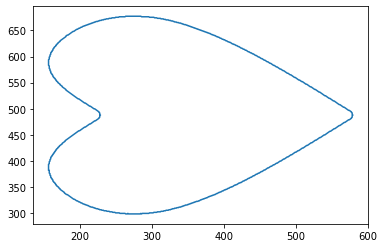

In [11]:
im = _image_processing.load_image(r"C:/Users/ghage/PycharmProjects/morphoscale/lib/polygon_test_shapes/heart.bmp")
im = _image_processing.smooth_image(im, 10)
curve = _image_curve.ImageCurve(im).curve()
plt.plot(*curve.transpose())

In [39]:
curve_obj = concave_enclosed_csf_list.ConcaveEnclosedCSFList(curve)

In [40]:
curve_obj.run()

Iteration: 0, Concavity:  163.21, Area to original %:  100.00
Iteration: 1000, Concavity:  19.80, Area to original %:  771.26
Iteration: 2000, Concavity:  4.96, Area to original %:  3292.96
Iteration: 3000, Concavity:  2.77, Area to original %:  6577.92
Iteration: 4000, Concavity:  2.15, Area to original %:  9417.59
Iteration: 5000, Concavity:  1.91, Area to original %:  11499.81
Iteration: 6000, Concavity:  1.80, Area to original %:  13196.67
Iteration: 7000, Concavity:  1.71, Area to original %:  15031.14
Iteration: 8000, Concavity:  1.64, Area to original %:  17020.45
Iteration: 9000, Concavity:  1.57, Area to original %:  19181.38


In [15]:
len(curve_obj.curves)

1124

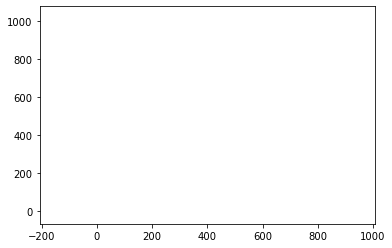

In [44]:
_ =[plt.plot(*curve.transpose()) for curve in curve_obj.curves[3]]

In [33]:
l = [curve_obj.curr_curve]

In [34]:
len(l)

1